# Some Neural Network Problems #

## Problem 1 ##

Consider the cell below, which selects a uniform random sample of outputs of the function $f(x,y) = x^2 - y^2$ on the region $[-1,1]\times[-1,1]$. 

In [ ]:
tempX = np.random.uniform(-1,1,2000)
tempY = np.random.uniform(-1,1,2000)

myX = np.array([tempX, tempY]).T

myX[:5]

def myfunc(X):
    
    return X[:,0]**2  - X[:,1]**2

myy = myfunc(myX)

1. Produce a 3D scatter plot of the data to confirm that $f(x,y)$ has a 'saddle point' graph.

2. Jupyter class notes for Wednesday's class are available on the [github page](https://github.com/aleahy-work/CS-STAT323-W24/tree/main/CNotes).  In them I attempt to train a two-layer model with a [ReLU](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/) activation function and the [ADAM optimizer](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/).  The training doesn't seem to succeed, with MSE not showing a consistent declining trend.  Modify the hyperparameters of the model until you produce a model that has MSE tending to zero over 100 epochs. You should try modifying the following hyperparameters as needed:

   + Batch size
   + The number of layers
   + The number of nodes in a given layer

The last two will require changes to the Model class. You could also potentially experiment with optimizers, loss functions, and activation functions.

**Warning:** Every time you modify your Model class you have to reinitialize your model instance.  If you change your batch size, you have to reinitialize your Dataloader.

3. In my training function done in class, I gave a quick "loss.item()" MSE measure at the end of each epoch.  The book's method uses loss_hist[epoch]/len(train_dl.dataset) instead.  (See below, and note that loss_fn is [nn.MSELoss](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html).)  Explain the difference between the two.  (This [discussion](https://discuss.pytorch.org/t/what-is-loss-item/61218/3) may be helpful.) **Then** produce a plot of loss_hist for all epochs. 

In [ ]:
for epoch in range(num_epochs):

    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch.long())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
        loss_hist[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.sum()
        
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)

4. Remember that training data is not a good estimate of model success, since neural networks tend to [overfit](https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/) the training data.

   + Ordinarily you would have to set aside some of the data for testing purposes, but *because of the way the data was generated* that won't be necessary.  Explain what I mean by this. Then generate a testing dataset 1/4 of the size of the training data, feed the features from this through the .forward() method of your model and use your loss function to find MSE for the testing data.  How does it compare to the MSE for your training data after 100 epochs?
   
    + You could also use the SKLearn [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) to compute MSE for your testing data.  Does it work?  If it doesn't, figure out how to fix it, and compare with the answer to your previous part. 

## Problem 2 ##

Consider the function $f(x,y)$ on the region $[-1,1]\times [-1,1]$ which has value 1 in the I and III quadrant and value -1 in the II and IV quadrant.  A sample from this function is given below.   This function is discussed on apges 419-430 of the textbok and in the ch13_part1.ipynb Jupyter notebook located [at the author's github page](https://github.com/rasbt/machine-learning-book/blob/main/ch13/ch13_part1.ipynb), where he solves this problem using slightly more advanced techniques (though it still may be helpful to read).  Your task is to use this data to find a neural network which fits this function with a categorical output.  Note that:

+ You will need to use the [binary classification loss function](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html)
+  Given my implementation of the function, it might be advisable to use the [hyperbolic tangent function](https://pytorch.org/docs/stable/generated/torch.tanh.html) instead of the sigmoid function in the final layer.  Why?
+  The key measure of success is accuracy
+  The model should require several layers and some consideration of activation functions

You should:

1. Implement a model which outputs training accuracy at the end of each epoch.  Then test your model by generating a test dataset and testing its accuracy.

2. Once you are satisfied with the performance of your model, you should mprove on your model by generating a validation set and outputing both training and validation accuracy at each epoch.  
   

In [64]:
tempX = np.random.uniform(-1,1,250)
tempY = np.random.uniform(-1,1,250)
mynewX = np.array([tempX, tempY]).T
myy = - np.ones(250)
myy[((tempX < 0) & (tempY < 0)) | ((tempX > 0) & (tempY > 0))] = 1

In [68]:
print(mynewX[:10])
print(myy[:10])

[[-0.2100423  -0.24223176]
 [-0.84033671 -0.88252459]
 [ 0.96339307 -0.21853388]
 [-0.31139506 -0.92060703]
 [-0.39964054  0.12267476]
 [ 0.54937592 -0.82549735]
 [ 0.82110002 -0.69089501]
 [-0.7079347  -0.91307726]
 [ 0.59534633  0.32167267]
 [ 0.26634699  0.84902265]]
[ 1.  1. -1.  1. -1. -1. -1.  1.  1.  1.]


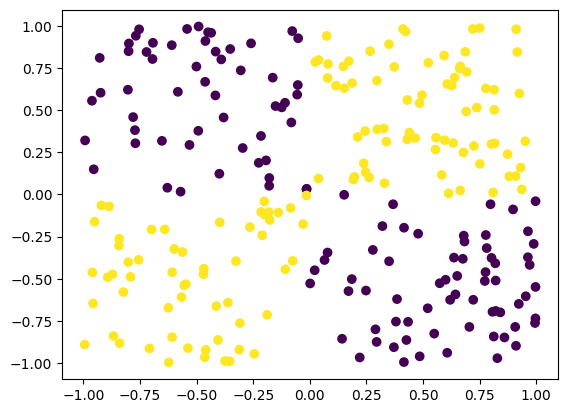

In [66]:
import matplotlib.pyplot as plt
plt.scatter(tempX, tempY, c= myy)
plt.show()

# Key #

## Problem 1 ##

Generating the random sample.

In [23]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [5]:
tempX = np.random.uniform(-1,1,2000)
tempY = np.random.uniform(-1,1,2000)

In [6]:
myX = np.array([tempX, tempY]).T

In [7]:
myX[:5]

array([[-0.23489504, -0.82403812],
       [ 0.85562608, -0.63647187],
       [ 0.77886399,  0.25325345],
       [ 0.02258302, -0.09061527],
       [-0.74448977,  0.26302843]])

In [8]:
def myfunc(X):
    
    return X[:,0]**2  - X[:,1]**2

In [9]:
myy = myfunc(myX)

In [10]:
myy[:5]

array([-0.62386315,  0.32699955,  0.54249181, -0.00770113,  0.48508107])

### Part 1 ###

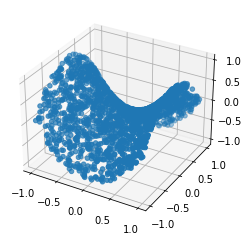

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(myX[:,0], myX[:,1], myy)
plt.show()

### Part 2 ###

In [12]:
myXtensor = torch.from_numpy(myX)

In [13]:
myXtensor[:5]

tensor([[-0.2349, -0.8240],
        [ 0.8556, -0.6365],
        [ 0.7789,  0.2533],
        [ 0.0226, -0.0906],
        [-0.7445,  0.2630]], dtype=torch.float64)

In [14]:
myXtensor.shape

torch.Size([2000, 2])

In [15]:
myytensor = torch.from_numpy(myy)

In [16]:
myytensor[:5]

tensor([-0.6239,  0.3270,  0.5425, -0.0077,  0.4851], dtype=torch.float64)

In [17]:
myytensor.shape

torch.Size([2000])

In [18]:
myytensor.dtype

torch.float64

In [19]:
train_ds = torch.utils.data.TensorDataset(myXtensor, myytensor)

In [20]:
batch_size = 20

In [21]:
train_dl = torch.utils.data.DataLoader(train_ds, batch_size, shuffle=True)

In [39]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.layer3 = nn.Linear(hidden_size, output_size)  

    def forward(self, x):
        x = self.layer1(x)
        x = nn.ReLU()(x)
        x = self.layer2(x)
        x = nn.ReLU()(x)
        x = self.layer3(x)
        return x
    
input_size = 2
hidden_size = 32
output_size = 1
 
model = Model(input_size, hidden_size, output_size)
# model = model.to(device)

learning_rate = 0.0001

loss_fn = nn.MSELoss()
 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [40]:
print(model)

Model(
  (layer1): Linear(in_features=2, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=1, bias=True)
)


In [30]:
num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs

for epoch in range(num_epochs):

    for x_batch, y_batch in train_dl:
        pred = torch.squeeze(model(x_batch.float()))  # torch.squeeze seem to be important
        loss = loss_fn(pred, y_batch.float())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if epoch % 5 == 0:
        print("Epoch is ", epoch, ' and MSE is ', loss.item())
#        loss_hist[epoch] += loss.item()*y_batch.size(0)
#        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
#        accuracy_hist[epoch] += is_correct.sum()
#        
#    loss_hist[epoch] /= len(train_dl.dataset)
#    accuracy_hist[epoch] /= len(train_dl.dataset)

Epoch is  0  and MSE is  0.12118808925151825
Epoch is  5  and MSE is  0.05811012536287308
Epoch is  10  and MSE is  0.030746281147003174
Epoch is  15  and MSE is  0.007399571593850851
Epoch is  20  and MSE is  0.003715238766744733
Epoch is  25  and MSE is  0.003569789929315448
Epoch is  30  and MSE is  0.0017457855865359306
Epoch is  35  and MSE is  0.0011491815093904734
Epoch is  40  and MSE is  0.0010524129029363394
Epoch is  45  and MSE is  0.0006643846281804144
Epoch is  50  and MSE is  0.0004956038319505751
Epoch is  55  and MSE is  0.0004200254625175148
Epoch is  60  and MSE is  0.0003240428923163563
Epoch is  65  and MSE is  0.0002067318418994546
Epoch is  70  and MSE is  0.00010609922173898667
Epoch is  75  and MSE is  0.00019621648243628442
Epoch is  80  and MSE is  0.00025750830536708236
Epoch is  85  and MSE is  0.0001416025625076145
Epoch is  90  and MSE is  0.0001016472015180625
Epoch is  95  and MSE is  7.194544014055282e-05


### Part 3 ###

loss.item() is the loss obtained in the batch--the mean square error for the last batch in the epoch.  This is subject to more variability than the overall average loss in the epoch, which is what loss_hist[epoch] represents:

###        loss_hist[epoch] += loss.item()*y_batch.size(0)

This code removes the "batch.size" value in the denominator.  (Remember, we are using MSE.) Then it adds it to the loss_hist for the epoch.  loss_hist is an SSE but then this line is used

###    loss_hist[epoch] /= len(train_dl.dataset)

which finds the MSE for the entire epoch.  The code below reinstates these computations and prints the *epoch* MSE at the end of every fifth epoch.

In [41]:
num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs

for epoch in range(num_epochs):

    for x_batch, y_batch in train_dl:
        pred = torch.squeeze(model(x_batch.float()))  # torch.squeeze seem to be important
        loss = loss_fn(pred, y_batch.float())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_hist[epoch] += loss.item()*y_batch.size(0)
        
    loss_hist[epoch] /= len(train_dl.dataset)
    if epoch % 5 == 0:
        print('Epoch is ', epoch, ' and epoch MSE is ', loss_hist[epoch])

Epoch is  0  and epoch MSE is  0.17510535299777985
Epoch is  5  and epoch MSE is  0.1252420262992382
Epoch is  10  and epoch MSE is  0.0701836603321135
Epoch is  15  and epoch MSE is  0.02392757183406502
Epoch is  20  and epoch MSE is  0.00821385050425306
Epoch is  25  and epoch MSE is  0.005349773244233802
Epoch is  30  and epoch MSE is  0.00393650820129551
Epoch is  35  and epoch MSE is  0.002822018500883132
Epoch is  40  and epoch MSE is  0.001910559344687499
Epoch is  45  and epoch MSE is  0.0012883934681303798
Epoch is  50  and epoch MSE is  0.0009039366833167151
Epoch is  55  and epoch MSE is  0.0006785187017521821
Epoch is  60  and epoch MSE is  0.0005381376555305906
Epoch is  65  and epoch MSE is  0.0004484195535769686
Epoch is  70  and epoch MSE is  0.0003861976551706903
Epoch is  75  and epoch MSE is  0.0003354018802929204
Epoch is  80  and epoch MSE is  0.0002952837525663199
Epoch is  85  and epoch MSE is  0.0002646123846352566
Epoch is  90  and epoch MSE is  0.0002439925962

In [42]:
myxplot = np.arange(0,100)

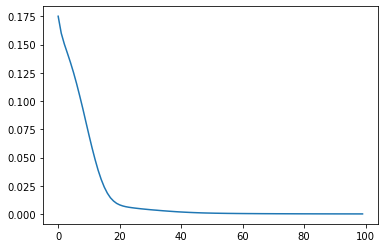

In [45]:
plt.plot(myxplot, loss_hist)
plt.show()

### Part 4 ###

The data was generated from a distribution. When you select a test set, you are taking a smaller sample from the distribution.  Another way to generate a sample from the distribution is to simply resample from the same distribution.

In [46]:
tempX = np.random.uniform(-1,1,500)
tempY = np.random.uniform(-1,1,500)

myX = np.array([tempX, tempY]).T

myX[:5]

def myfunc(X):
    
    return X[:,0]**2  - X[:,1]**2

myy = myfunc(myX)

In [47]:
myXtensor = torch.from_numpy(myX)
myytensor = torch.frommyxplot_numpy(myy)

In [52]:
myytensor[:5]

tensor([0.4997, 0.3344, 0.0457, 0.5345, 0.8310], dtype=torch.float64)

In [54]:
mytestpred = torch.squeeze(model(myXtensor.float()))

In [60]:
loss_fn(mytestpred, myytensor).detach().numpy()

array(0.00023845)

In [62]:
loss_hist[99] - loss_fn(mytestpred, myytensor).detach().numpy()

-2.640349150750089e-05

**Conclusion:** The MSE between the last are essentially the same--up to the fourth decimal place.  So the model does not appear to be overfitting.

#### Part (2) ####

In [70]:
from sklearn.metrics import mean_squared_error

In [69]:
mean_squared_error(mytestpred.detach().numpy(), myytensor.detach().numpy())

0.00023844919801047765

You had to convert them into numpy arrays first.

## Problem 2 ##

In [103]:
tempX = np.random.uniform(-1,1,250)
tempY = np.random.uniform(-1,1,250)
mynewX = np.array([tempX, tempY]).T
myy = np.zeros(250)
myy[((tempX < 0) & (tempY < 0)) | ((tempX > 0) & (tempY > 0))] = 1

In [104]:
print(mynewX[:10])
print(myy[:10])

[[-0.54330373  0.56504425]
 [-0.67499545 -0.51890448]
 [-0.21047588  0.01909751]
 [ 0.86625577  0.94789567]
 [-0.54559522  0.5443074 ]
 [ 0.28026695  0.22414454]
 [ 0.30631611  0.86179202]
 [-0.29388637 -0.61632361]
 [-0.49465519 -0.83599154]
 [-0.1430351  -0.03039803]]
[0. 1. 0. 1. 0. 1. 1. 1. 1. 1.]


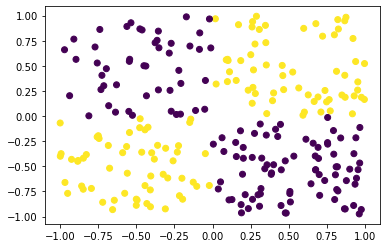

In [105]:
import matplotlib.pyplot as plt
plt.scatter(tempX, tempY, c= myy)
plt.show()

In [106]:
import torch

In [107]:
tensX = torch.from_numpy(mynewX)

In [108]:
tensy = torch.from_numpy(myy)

In [109]:
tensX[:5]

tensor([[-0.5433,  0.5650],
        [-0.6750, -0.5189],
        [-0.2105,  0.0191],
        [ 0.8663,  0.9479],
        [-0.5456,  0.5443]], dtype=torch.float64)

In [110]:
tensy[:5]

tensor([0., 1., 0., 1., 0.], dtype=torch.float64)

In [111]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

train_ds = TensorDataset(tensX, tensy)

torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [112]:
for xt, yt in train_dl:
    print(xt.dtype)
    print(yt)
    break

torch.float64
tensor([0., 1.], dtype=torch.float64)


In [113]:
import torch.nn as nn

In [141]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)  
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.layer3 = nn.Linear(hidden_size, output_size)  

    def forward(self, x):
        x = self.layer1(x)
        x = nn.ReLU()(x)
        x = self.layer2(x)
        x = nn.ReLU()(x)
        x = self.layer3(x)
        x = nn.Sigmoid()(x)
        return x
 

In [142]:
   
input_size = 2
hidden_size = 16
output_size = 1
 
model = Model(input_size, hidden_size, output_size)

learning_rate = 0.0001

loss_fn = nn.BCELoss()
 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [143]:
print(model)

Model(
  (layer1): Linear(in_features=2, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=16, bias=True)
  (layer3): Linear(in_features=16, out_features=1, bias=True)
)


In [144]:
num_epochs = 500
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs

for epoch in range(num_epochs):

    for x_batch, y_batch in train_dl:
        pred = model(x_batch.float())
        loss = loss_fn(pred.squeeze(), y_batch.float())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
     
        loss_hist[epoch] += loss.item()*y_batch.size(0)
        is_correct = ((pred.T > .5).float() == y_batch).float()
        accuracy_hist[epoch] += is_correct.sum().float()

    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)
    if epoch % 10 ==0:
        print("Epoch ", epoch, " and accuracy is ", accuracy_hist[epoch]) 
    


Epoch  0  and accuracy is  tensor(0.5160)
Epoch  10  and accuracy is  tensor(0.6440)
Epoch  20  and accuracy is  tensor(0.8440)
Epoch  30  and accuracy is  tensor(0.9000)
Epoch  40  and accuracy is  tensor(0.9400)
Epoch  50  and accuracy is  tensor(0.9480)
Epoch  60  and accuracy is  tensor(0.9600)
Epoch  70  and accuracy is  tensor(0.9560)
Epoch  80  and accuracy is  tensor(0.9560)
Epoch  90  and accuracy is  tensor(0.9560)
Epoch  100  and accuracy is  tensor(0.9560)
Epoch  110  and accuracy is  tensor(0.9600)
Epoch  120  and accuracy is  tensor(0.9600)
Epoch  130  and accuracy is  tensor(0.9640)
Epoch  140  and accuracy is  tensor(0.9640)
Epoch  150  and accuracy is  tensor(0.9640)
Epoch  160  and accuracy is  tensor(0.9640)
Epoch  170  and accuracy is  tensor(0.9640)
Epoch  180  and accuracy is  tensor(0.9760)
Epoch  190  and accuracy is  tensor(0.9760)
Epoch  200  and accuracy is  tensor(0.9800)
Epoch  210  and accuracy is  tensor(0.9800)
Epoch  220  and accuracy is  tensor(0.9840)

#### Generate test data ####

In [145]:
testX = np.random.uniform(-1,1,250)
testY = np.random.uniform(-1,1,250)
mytestX = np.array([testX, testY]).T
mytesty = np.zeros(250)
mytesty[((testX < 0) & (testY < 0)) | ((testX > 0) & (testY > 0))] = 1

In [147]:
print(mytestX[:10])
print(mytesty[:10])

[[ 0.59049631 -0.0333601 ]
 [-0.55667857  0.58853849]
 [ 0.48588408 -0.45823048]
 [ 0.85211994  0.20706459]
 [-0.02993026  0.54636412]
 [ 0.96736268  0.19257166]
 [-0.11252797  0.52846114]
 [ 0.30514756 -0.57042726]
 [-0.60921051 -0.08827714]
 [-0.97150209  0.59329913]]
[0. 0. 0. 1. 0. 1. 0. 0. 1. 0.]


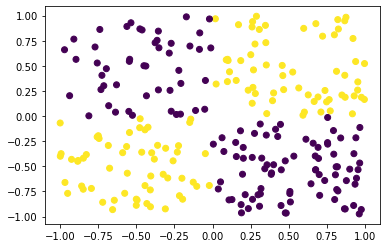

In [148]:
import matplotlib.pyplot as plt
plt.scatter(tempX, tempY, c= myy)
plt.show()

In [150]:
tensX = torch.from_numpy(mytestX)

In [151]:
tensy = torch.from_numpy(mytesty)

In [152]:
tensX[:5]

tensor([[ 0.5905, -0.0334],
        [-0.5567,  0.5885],
        [ 0.4859, -0.4582],
        [ 0.8521,  0.2071],
        [-0.0299,  0.5464]], dtype=torch.float64)

In [153]:
tensy[:5]

tensor([0., 0., 0., 1., 0.], dtype=torch.float64)

In [166]:
pred = (model(tensX.float()) > .5).float().T.numpy()

In [170]:
pred[0]

array([0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 0.

In [162]:
mytesty

array([0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 0.

In [165]:
from sklearn.metrics import accuracy_score

In [171]:
accuracy_score(pred[0],mytesty)

0.98

**Conclusion:** On the test data, we show 98% accuracy.. 